Energy demand prediction using machine learning

In [9]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [10]:
# Wczytanie danych
data = pd.read_csv("D:\SAGES\project\Energy_consumption.csv")
data.set_index('Timestamp', inplace=True)
data

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...
2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471


In [11]:
# Wyświetlenie podstawowych informacji o danych
print("Podstawowe informacje o danych:")
print(data.info())
print("\nPodgląd danych:")
print(data.head())

Podstawowe informacje o danych:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2022-01-01 00:00:00 to 2022-02-11 15:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   SquareFootage      1000 non-null   float64
 3   Occupancy          1000 non-null   int64  
 4   HVACUsage          1000 non-null   object 
 5   LightingUsage      1000 non-null   object 
 6   RenewableEnergy    1000 non-null   float64
 7   DayOfWeek          1000 non-null   object 
 8   Holiday            1000 non-null   object 
 9   EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 85.9+ KB
None

Podgląd danych:
                     Temperature   Humidity  SquareFootage  Occupancy  \
Timestamp                                                               
2022-01-01 00:00:00    25.

In [12]:
# Eksploracja danych
print("\nSprawdzanie braków danych:")
print(data.isnull().sum())


Sprawdzanie braków danych:
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            1000 non-null   datetime64[ns]
 1   Temperature          1000 non-null   float64       
 2   Humidity             1000 non-null   float64       
 3   SquareFootage        1000 non-null   float64       
 4   Occupancy            1000 non-null   int64         
 5   RenewableEnergy      1000 non-null   float64       
 6   EnergyConsumption    1000 non-null   float64       
 7   HVACUsage_Off        1000 non-null   bool          
 8   HVACUsage_On         1000 non-null   bool          
 9   LightingUsage_Off    1000 non-null   bool          
 10  LightingUsage_On     1000 non-null   bool          
 11  DayOfWeek_Friday     1000 non-null   bool          
 12  DayOfWeek_Monday     1000 non-null   bool          
 13  DayOfWeek_Saturday   1000 non-null

In [14]:
# Zmiana danych kategorycznych
le = LabelEncoder()

for col in ['HVACUsage','LightingUsage', 'DayOfWeek', 'Holiday']:
    le.fit(data[col])
    data[col] = le.transform(data[col])

data.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732


In [15]:
# Wybór cech i zmiennej docelowej
X = data.drop(columns=['EnergyConsumption'])  # Cechy
y = data['EnergyConsumption']                # Zmienna docelowa
X

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday
Timestamp,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0
...,...,...,...,...,...,...,...,...,...
2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,0,0,21.194696,2,0
2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,0,1,25.748176,5,1
2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,0,1,0.297079,0,1


In [16]:
# Skalowanie cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Podział danych na zestawy treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [18]:
# Trenowanie modelu
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Ocena modelu na zbiorze testowym
y_pred = model.predict(X_test)

In [20]:
# Obliczenie metryk
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [21]:
print("\nWyniki modelu:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Wyniki modelu:
Mean Absolute Error (MAE): 4.27
Mean Squared Error (MSE): 27.04
Root Mean Squared Error (RMSE): 5.20


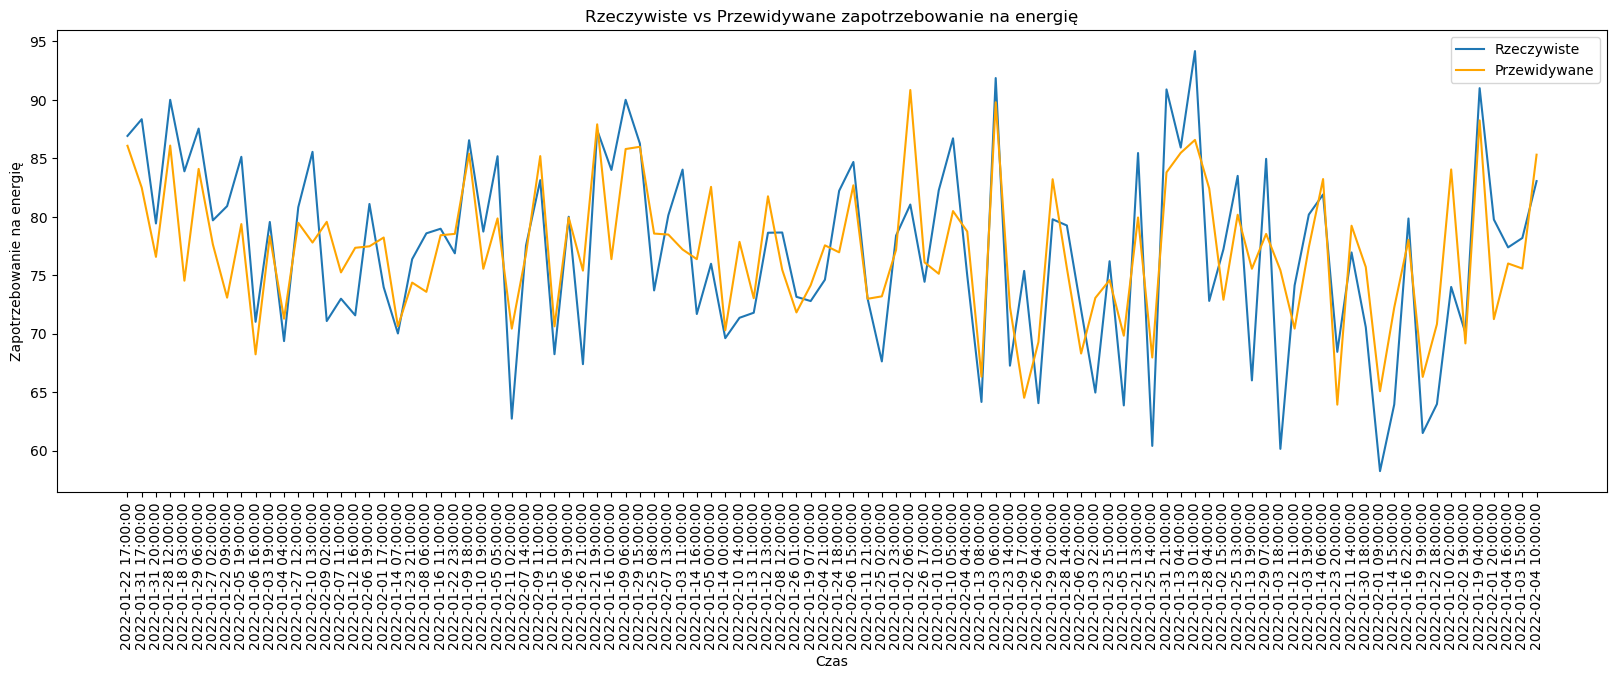

In [22]:
# Wykres rzeczywiste vs przewidywane
plt.figure(figsize=(20, 6))
plt.plot(y_test, label='Rzeczywiste')
plt.plot(y_pred, label='Przewidywane', color='orange')
plt.title("Rzeczywiste vs Przewidywane zapotrzebowanie na energię")
plt.xlabel("Czas")
plt.xticks(rotation=90)
plt.ylabel("Zapotrzebowanie na energię")
plt.legend()
plt.show()

In [23]:
# Opcjonalnie: zapisanie modelu lub predykcji
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('energy_predictions.csv', index=False)
print("\nPredykcje zapisane do pliku 'energy_predictions.csv'")


Predykcje zapisane do pliku 'energy_predictions.csv'
